In [1]:
##############################################################
#  WARNING, EXECUTE THIS LINE BEFORE EXEsCUTING ANY ROS CODE #
#                                                            #
#             source opt/ros/foxy/setup.bash                 #
#                                                            #
##############################################################

In [2]:
from __future__ import absolute_import, division, print_function# need to undestend their utility <-------- UNKNOWN
import tensorflow as tf
import keras# dont import keras ftom tensorflow library otherwise the code below will fail
from sklearn.model_selection import train_test_split
import numpy as np
# from keras_visualizer import visualizer# used to visualize the neural network <-------------------- MORE INFORMATION
# from tensorflow.keras.utils import plot_model# used to plot the neural network model <------------------MORE INFO
import matplotlib.pyplot as plt# this library will be used for data visualization

TestSize = 0.1# size of the test set

percent = 0.2# percentage of data we want to give to our system from all the data aveilable
# we start to take them from the start of the dataset , one after one)

LukyNumber = 4# the number that in this session will be associated to 1 while the others will be set to 0
# (we set all the other numbers to zero becouse otherwise the neural network behave incorrectly with thos libraries)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# import the dataset "mnist" that contains all the images of the numbers
# and relatives lables an then assine all those data to two sets ( training set and test set )

# adjusting the type of the data contained in the arrays in this way they can be also negative( maybe now it is usless)
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

# i have to scale the brightness of each pixel becouse otherwise i saturate the activation function (a wise man told me)
x_train = x_train/255
x_test = x_test/255

In [4]:
# I want to see some information about my data and they format
print(type(x_train))# return the typology of our data set of images
print(len(x_train))# retunr the lenth of the data set ( how much images we have )
print(np.shape(x_train))# return the shape of the data set, in our case we have the
# lenth and then the dimensions of the images

print(type(x_test))# return the typology of our training set of images
print(len(x_test))# retunr the lenth of the training set ( how much images we have )
print(np.shape(x_test))# return the shape of the training set, in our case we have the
# lenth and then the dimensions of the images

#print(dir(np))
#print(help(np.concatenate))

<class 'numpy.ndarray'>
60000
(60000, 28, 28)
<class 'numpy.ndarray'>
10000
(10000, 28, 28)


In [5]:
'''                             I HAVE TO CHECK IF THIS PART OF THE CODE IS CORRECT                            '''

#                                    Reduction of the dataset dimension

x_total_temp = np.append(x_train, x_test, axis=0)# CHECK IF THE PARTS ARE APPENDED CORRECTLY <------------- WARNING
print("Shape of x_total_temp: {0}".format(np.shape(x_total_temp)))

x_total = x_total_temp[0: int(np.shape(x_total_temp)[0]*percent)]
print("Shape of x_total reduced to {1}: {0}".format(np.shape(x_total), percent))

y_total_temp = np.append(y_train, y_test, axis=0)# CHECK IF THE PARTS ARE APPENDED CORRECTLY <------------- WARNING
print("Shape of y_total_temp: {0}".format(np.shape(y_total_temp)))

y_total = y_total_temp[0: int(np.shape(y_total_temp)[0]*percent)]
print("Shape of y_total reduced to {1}: {0}".format(np.shape(y_total), percent))

Shape of x_total_temp: (70000, 28, 28)
Shape of x_total reduced to 0.2: (14000, 28, 28)
Shape of y_total_temp: (70000,)
Shape of y_total reduced to 0.2: (14000,)


In [6]:
"""                                       THE ERROR COULD BE HERE                                                """
# Redistribution of the data in two sets ( test and train)
x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=TestSize)

In [7]:
"""                                       THE ERROR COULD BE HERE                                                """
#                                     Assignment of values [1, -1]

# REWRITE THE CODE BECAUSE IT ISNT EFFISCENT ENOUGH (nested for loops or something else)

for i in range(0, np.shape(y_train)[0]):# <-------------------------------------------------- WARNING (use iterator)
    if y_train[i] == LukyNumber:
        y_train[i] = 1
    else:
        y_train[i] = -1
        
for i in range(0, np.shape(y_test)[0]):# <-------------------------------------------------- WARNING (use iterator)
    if y_test[i] == LukyNumber:
        y_test[i] = 1
    else:
        y_test[i] = -1
print(y_test.dtype)

int8


In [8]:
# TEST TO SEE THE SHAPE OF THE DATA
print("Lenth of y_train : {}\n".format(len(y_train)))
print("Shape of y_train : {}\n".format(np.shape(y_train)))
print("y_training : {}\n".format(y_train))

print("Lenth of y_test : {}\n".format(len(y_test)))
print("Shape of y_test : {}\n".format(np.shape(y_test)))
print("y_test : {}\n".format(y_test))

# I WANT TO SEE THE SHAPE OF PICTURES
print("Lenth of x_train : {}\n".format(len(x_train)))
print("Shape of x_train : {}\n".format(np.shape(x_train)))
print("x_train : {}\n".format(x_train))

print("Lenth of x_test : {}\n".format(len(x_test)))
print("Shape of x_test : {}\n".format(np.shape(x_test)))
print("x_test : {}\n".format(x_test))

Lenth of y_train : 12600

Shape of y_train : (12600,)

y_training : [-1 -1 -1 ... -1 -1 -1]

Lenth of y_test : 1400

Shape of y_test : (1400,)

y_test : [-1 -1 -1 ... -1 -1 -1]

Lenth of x_train : 12600

Shape of x_train : (12600, 28, 28)

x_train : [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0

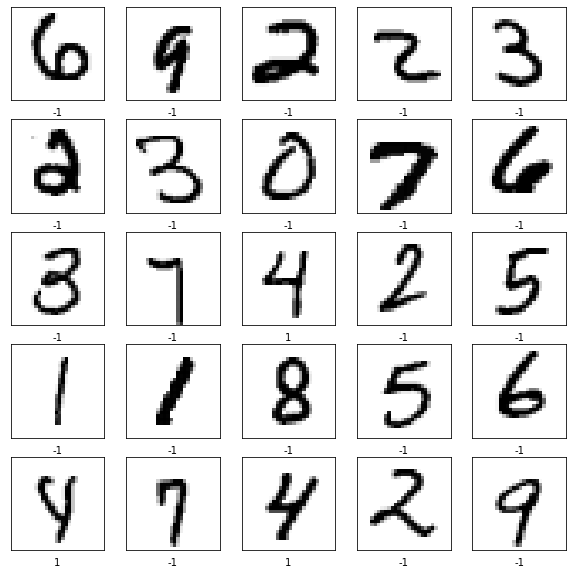

In [9]:
# display the first 25 training images with labels and verify that the data is in the correct formate.
plt.figure(figsize=(10,10))# <--------------------------------------------------------------------------- UNKNOWN
for i in range(25):  # i want to plot 25 images
    plt.subplot(5,5,i+1)  # the letter "i" rappresent the position
    plt.xticks([])  # <------------------------------------------------------------------------------------ UNKNOWN
    plt.yticks([])
    plt.grid(False)  # in this way i will not have the grid in on the images
    plt.imshow(x_train[i], cmap=plt.cm.binary)# load the image and make it show black and white
    plt.xlabel(y_train[i])  # add the lable associated to that image under it
plt.show()  # show all the images

In [10]:
# HERE I RESHAPE THE IMAGES FROM A MATRIX TO A VECTOR MANTAINING THE DATA CONTENT
SrecchedDatasetX = np.reshape(x_train, (np.shape(x_train)[0], 784))# the dataset has 11200 elements, you have to make this part of code more general

# TEST TO SEE THE SHAPE OF THE DATA
print("Lenth of y_training : {}\n".format(len(y_train)))
print("Shape of y_training : {}\n".format(np.shape(y_train)))
print("y_training : {}\n".format(y_train))

# I WANT TO SEE THE SHAPE OF PICTURES
print("Lenth of x_training : {}\n".format(len(SrecchedDatasetX)))
print("Shape of x_training : {}\n".format(np.shape(SrecchedDatasetX)))
print("x_training : {}\n".format(SrecchedDatasetX))

Lenth of y_training : 12600

Shape of y_training : (12600,)

y_training : [-1 -1 -1 ... -1 -1 -1]

Lenth of x_training : 12600

Shape of x_training : (12600, 784)

x_training : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



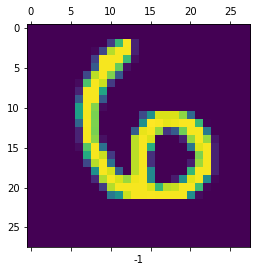

In [11]:
# HERE I TEST THE CONVERSION GOING BACKWARD (CHEKING IF THE IMAGE IS CORRECT)
#print(SrecchedDatasetX[1])
prova = np.reshape(SrecchedDatasetX[int(0)], (28, 28))# here at index you can put whatewer number you wish to see if the conversion went correctly
plt.matshow(prova)
plt.xlabel(y_train[0])
plt.show()

The erlier part was a preprocessing of the data, now we will use distributed gradient traking for the training of the neural network.
-

In [12]:


ZeroVector = np.zeros(784+1)
#print(ZeroVector)

In [13]:

np.random.seed(0)

###############################################################################

T = 4 # Layers
d = 784  # Number of neurons in each layer. Same numbers for all the layers

# Training Set
#label_point = temp_label_point[0] # D = x0 # <-------------------------------------------------- Warning, change it
#label_point = label_point[0]

label_point = y_train
data_point = SrecchedDatasetX# vectorized image

# Gradient Method Parameters
max_iters = 4000 # epochs
stepsize = 0.0005 # learning rate

# # questa cosa non va bene, serve solo per il debugghing
# for i in range(0, max_iters):
#     label_point[i] = label_point[i%400]
#     data_point[i] = data_point[i%400]

###############################################################################
# Activation Function

DecisionVAriable = False
'''
def sigmoid_fn(xi):
    return 1/(1+np.exp(-xi))

# Derivative of Activation Function
def sigmoid_fn_derivative(xi):
    return sigmoid_fn(xi)*(1-sigmoid_fn(xi))
'''


def sigmoid_fn(xi):# tanh
    return (np.exp(xi) - np.exp(-xi)) / (np.exp(xi) + np.exp(-xi))

def sigmoid_fn_derivative(xi):# tanh_derivative
    return (2/(np.exp(xi)+np.exp(-xi)))**2


# Inference: x_tp = f(xt,ut)
def inference_dynamics(xt,ut):
    """
        input: 
              xt current state
              ut current input
        output: 
              xtp next state
    """
    xtp = np.zeros(d)
    for ell in range(d):
        temp = xt@ut[ell,1:] + ut[ell,0] # including the bias

        xtp[ell] = sigmoid_fn( temp ) # x' * u_ell
  
    return xtp

# Forward Propagation
def forward_pass(uu,x0):
    """
        input: 
              uu input trajectory: u[0],u[1],..., u[T-1]
              x0 initial condition
        output: 
              xx state trajectory: x[1],x[2],..., x[T]
    """
    xx = np.zeros((T,d))
    xx[0] = x0

    for t  in range(T-1):
        xx[t+1] = inference_dynamics(xx[t],uu[t]) # x^+ = f(x,u)

    return xx
  


# Adjoint dynamics: 
#   state:    lambda_t = A.T lambda_tp
#   output: deltau_t = B.T lambda_tp
def adjoint_dynamics(ltp,xt,ut):
    """
        input: 
              llambda_tp current costate
              xt current state
              ut current input
        output: 
              llambda_t next costate
              delta_ut loss gradient wrt u_t
    """
    df_dx = np.zeros((d,d))

    # df_du = np.zeros((d,(d+1)*d))
    Delta_ut = np.zeros((d,d+1))

    for j in range(d):
        dsigma_j = sigmoid_fn_derivative(xt@ut[j,1:] + ut[j,0]) 

        df_dx[:,j] = ut[j,1:]*dsigma_j
        # df_du[j, XX] = dsigma_j*np.hstack([1,xt])
    
        # B'@ltp
        Delta_ut[j,0] = ltp[j]*dsigma_j
        Delta_ut[j,1:] = xt*ltp[j]*dsigma_j
  
    lt = df_dx@ltp # A'@ltp
    # Delta_ut = df_du@ltp

    return lt, Delta_ut

# Backward Propagation
def backward_pass(xx,uu,llambdaT):
    """
        input: 
              xx state trajectory: x[1],x[2],..., x[T]
              uu input trajectory: u[0],u[1],..., u[T-1]
              llambdaT terminal condition
        output: 
              llambda costate trajectory
              delta_u costate output, i.e., the loss gradient
    """
    llambda = np.zeros((T,d))
    llambda[-1] = llambdaT

    Delta_u = np.zeros((T-1,d,d+1))

    for t in reversed(range(T-1)): # T-2,T-1,...,1,0
        llambda[t], Delta_u[t] = adjoint_dynamics(llambda[t+1],xx[t],uu[t])

    return Delta_u

  
###############################################################################
# MAIN
###############################################################################

J = np.zeros(max_iters)                       # Cost

# Initial Weights / Initial Input Trajectory
uu = np.random.randn(T-1, d, d+1)# there is d+1 becouse we have bias in each node

# Initial State Trajectory
xx = forward_pass(uu,data_point[0]) # T x d


# forcing the last layer
for i in range(1, np.shape(uu)[1]):
    uu[np.shape(uu)[0]-1][i]=ZeroVector
print("Riassegnamento {0}".format(uu[np.shape(uu)[0]-1][0:3]))


# GO!
for k in range(max_iters):
    #if k%2 == 0:
    print('Cost at k={:d} is {:.8f}'.format(k,J[k-1]))
   
    # Initial State Trajectory
    xx = forward_pass(uu,data_point[0]) # T x d

    # Backward propagation
    llambdaT = 2*( xx[-1,:] - label_point[k]) # xT . LambdaT = 2*(-LablePoint)
    Delta_u = backward_pass(xx,uu,llambdaT) # the gradient of the loss function 
  
    # Update the weights
    uu = uu - stepsize*Delta_u # overwriting the old value


    '''
    for i in range(1, np.shape(uu)[1]):
        uu[np.shape(uu)[0]-1][i]=ZeroVector

    print("Riassegnamento {0}".format(uu[np.shape(uu)[0]-1][0:3]))
    print("xx {0}".format(xx[np.shape(xx)[0]-1][0:3]))
    '''


  
    # Forward propagation
    xx = forward_pass(uu,data_point[0])
  
    # Store the Loss Value across Iterations
    J[k] = (xx[-1,:] - label_point[k])@(xx[-1,:] - label_point[k]) # it is the cost at k+1
    # np.linalg.norm( xx[-1,:] - label_point )**2

Riassegnamento [[-1.22338651  1.06290038  1.27139921 ...  1.58171628 -0.59934963
  -0.19204473]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Cost at k=0 is 0.00000000
Cost at k=1 is 103.12022137
Cost at k=2 is 61.46067155
Cost at k=3 is 44.69694492
Cost at k=4 is 35.51577203
Cost at k=5 is 29.70406157
Cost at k=6 is 25.69133537
Cost at k=7 is 22.75385911
Cost at k=8 is 20.51072724
Cost at k=9 is 18.74208289
Cost at k=10 is 17.31205399
Cost at k=11 is 16.13211910
Cost at k=12 is 15.14212512
Cost at k=13 is 2486.11329827
Cost at k=14 is 33.41237765
Cost at k=15 is 28.28766310
Cost at k=16 is 24.67359284
Cost at k=17 is 21.98796183
Cost at k=18 is 19.91401338
Cost at k=19 is 18.26444982
Cost at k=20 is 16.92136837
Cost at k=21 is 2417.37941899
Cost at k=22 is 38.74073130
Cost at k=23 is 1759.23928240
Cost at k=24 is 82.03505915
Cost at k=25 is 54.02970483
Cost at k=26 is 1440.54439524
Cos

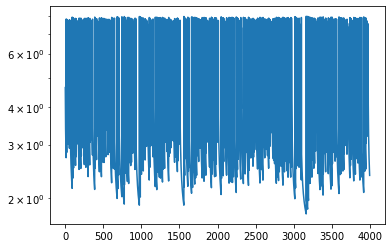

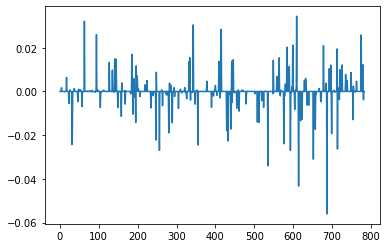

In [14]:

_,ax = plt.subplots()
ax.plot(range(max_iters),np.log(J))
plt.yscale("log")
plt.show();

plt.plot(Delta_u[0,:,0])

In [15]:
np.shape(ZeroVector)

(785,)

In [16]:
np.shape(xx)

(4, 784)

In [17]:
np.shape(uu)

(3, 784, 785)

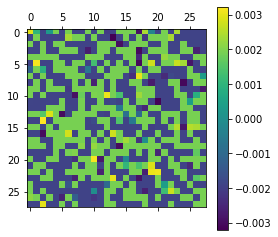

In [18]:
AAAA = uu[2][90][1:785]
prova = np.reshape(AAAA, (28, 28))# here at index you can put whatewer number you wish to see if the conversion went correctly
plt.matshow(prova)
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
9.99947256e-001

0.999947256

Shape of the solutions propagationa (4, 784)
label_point :1
NN concensus: -0.20877345325276014


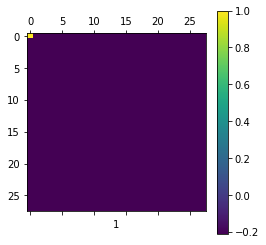

In [20]:
mm = 91
xx = forward_pass(uu,data_point[mm])
print("Shape of the solutions propagationa {0}".format(np.shape(xx)))
#print("Predicted solution {0}".format(xx[-1][:]))
print("label_point :{0}".format(label_point[mm]))
print("NN concensus: {0}".format(np.mean(xx[-1][:])))

prova = np.reshape(xx[3], (28, 28))# here at index you can put whatewer number you wish to see if the conversion went correctly
plt.matshow(prova)
plt.colorbar()# i want to have the gradueted bar with colors
plt.grid(False)# i dont want to have a grid on the image
plt.xlabel(label_point[mm])# write the number on the photo on x axis
plt.show()

In [21]:
np.mean(xx[-1][:])

-0.20877345325276014

In [22]:
uu = np.random.randn(T-1, d, d+1)

In [23]:
np.shape(uu)

(3, 784, 785)

In [24]:

lista = []
lista2 = []
for i in range(-10, 10, 1):
    lista.append(sigmoid_fn(i))
    lista2.append(sigmoid_fn_derivative(i))
    iteratore.append(i)
print(lista)


plt.plot(iteratore, lista2)
plt.show()

NameError: name 'iteratore' is not defined

In [ ]:
def ReluPlus(xi):
    if xi>=0:
        return xi
    else:
        return 0.1*xi

def ReluPlus_derivative(xi):
    if xi>=0:
        return 1
    else:
        return 0.1
    
listaaaa = []
listaaaa2 = []
iteratore = []
for i in range(-10, 10, 1):
    listaaaa.append(ReluPlus(i))
    listaaaa2.append(ReluPlus_derivative(i))
    iteratore.append(i)
print(listaaaa)
print(listaaaa2)

plt.plot(iteratore, listaaaa2)
plt.show()

In [ ]:
#dir(tf.keras.layers)

In [ ]:
def tanh(xi):
    return (np.exp(xi) - np.exp(-xi)) / (np.exp(xi) + np.exp(-xi))

def tanh_derivative(xi):
    return (2/(np.exp(xi)+np.exp(-xi)))**2
    
listaaaa = []
listaaaa2 = []
iteratore = []
for i in range(-10, 10, 1):
    listaaaa.append(tanh(i))
    listaaaa2.append(tanh_derivative(i))
    iteratore.append(i)
print(listaaaa)
print(listaaaa2)

plt.plot(iteratore, listaaaa)
plt.show()

In [ ]:
plt.plot(iteratore, listaaaa2)
plt.show()